## Working With Maps in Python

This notebook shows how to work with maps in Python using matplotlib and basemap. It is based on two articles: ["Working With Maps in Python"][1] by Max Berggren which is itself based on the second article ["Working with shapefiles, projections and world maps in ggplot"][2] by Kristoffer Magnusson. The latter uses R and ggplot and the former is a translation of the former into Python using matplotlib and the [basemap][3] library.

[1]: http://maxberggren.github.io/2015/08/04/basemap/
[2]: http://rpsychologist.com/working-with-shapefiles-projections-and-world-maps-in-ggplot
[3]: http://matplotlib.org/basemap/

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap
from IPython.display import set_matplotlib_formats

# Turn on retina display mode
set_matplotlib_formats('retina')

### The Robinson Projection

Since the earth is spherical, all 2D representations of the earth are estimations and cartographers are constantly looking for the best way to represent the earth with the least amount of distortion. The different ways that the earth can be represented two-dimensionally are known as projections since they project the earth in 3D space onto a 2D space. Three popular projection choices are Robinson, Winkel tripel, and Kavrayskiy 7 projections. The R and ggplot example Kristoffer uses the Robinson projection, so we'll use that one here as well. Incidentally, the Robinson projection was previously used by National Geographic, as Kristoffer explains in his article, and was eventually replaced by the Winkel Tripel projection. Kristoffer goes on to give an example of how the latter looks at the end of his article, but unfortunately that projection is not currently available in the basemap library. 

Creating our projection is easy. Simply call the `Basemap` constructor and pass in the name of the projection that you want to use---in our case that will be 'kav7'. Then we need to specify the latitude and longitude of the center of the map. Finally, we specify the resolution with which we wish to draw boundaries of the map (e.g., the coastlines). The options available are 'c' (crude), 'l' (low), 'i' (intermediate), 'h' (high), 'f' (full) or None. The higher the resolution the longer it takes to draw the map. The default value for this is 'c', which we will go ahead and specify in our example. If None is chosen for this parameter, no boundary data will be read in and any calls to methods such as `drawcoastlines` will raise an error.

In [7]:
m = Basemap(resolution='c',
            projection='robin',
            lat_0=0., lon_0=0.)  # Center around latitude, longitude (0,0)

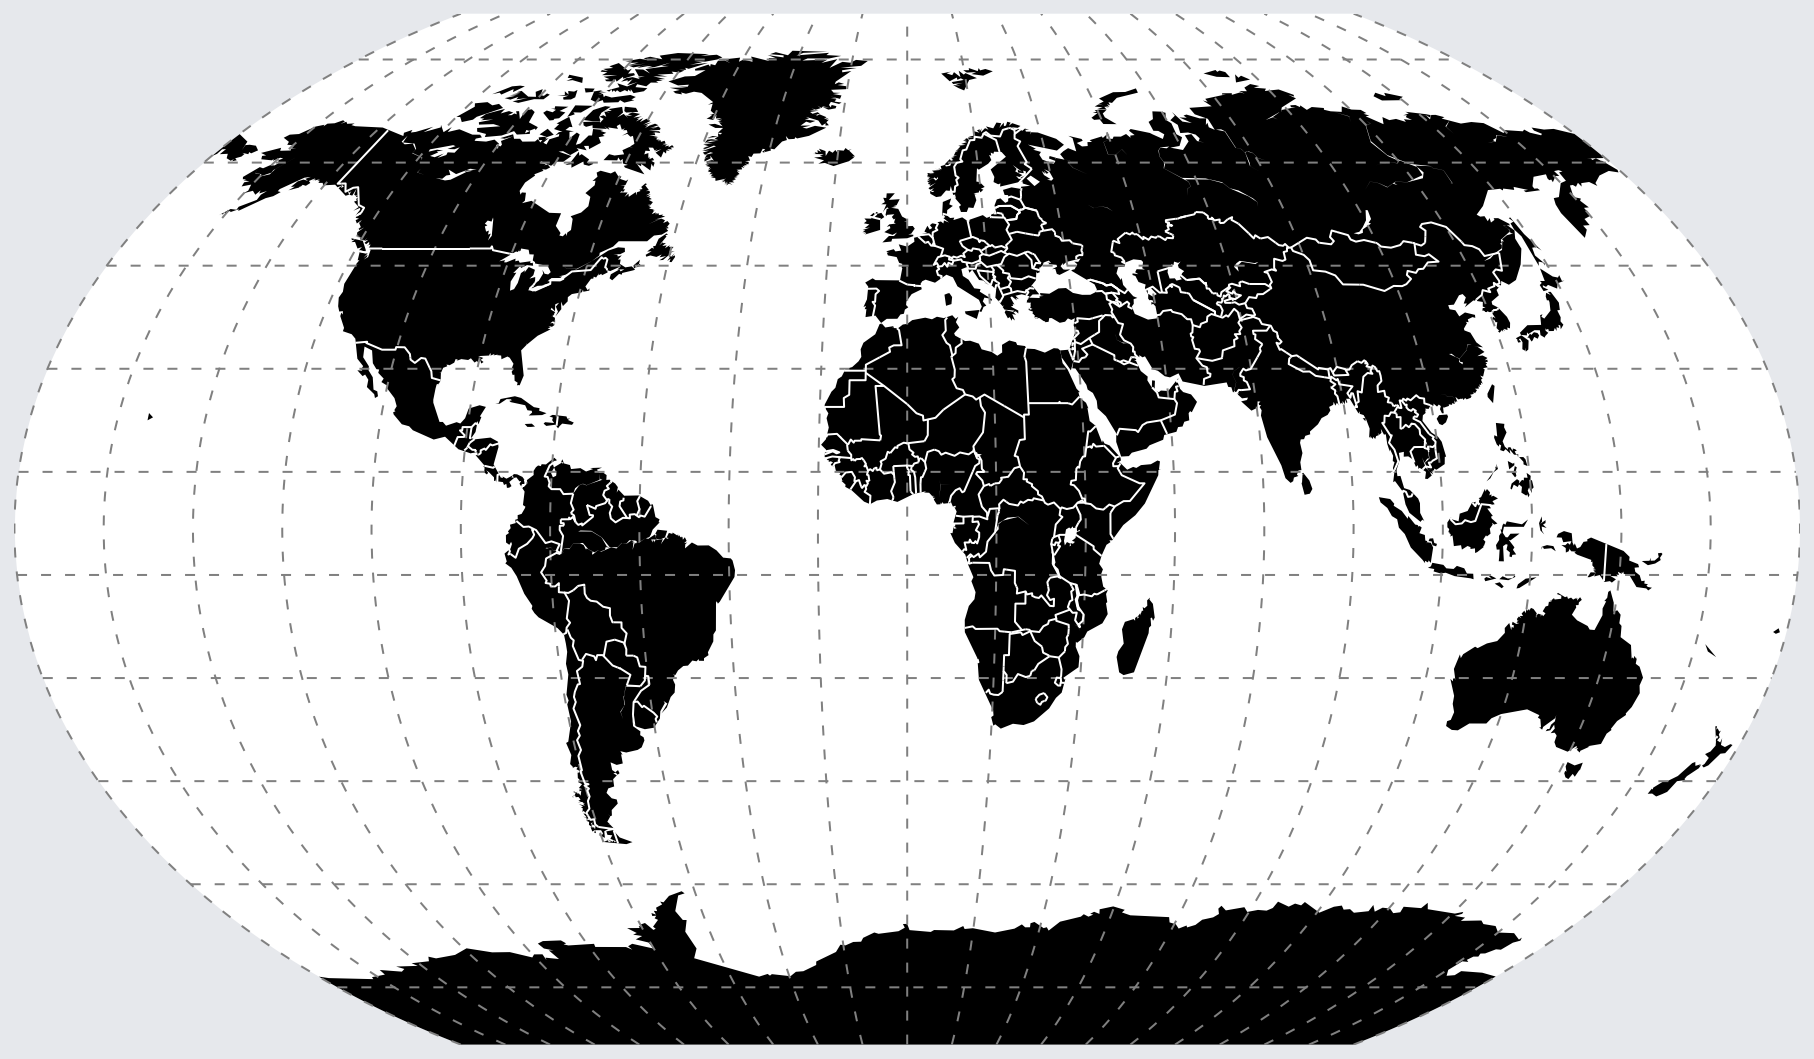

In [8]:
fig = plt.figure(figsize=(16,20))
fig.patch.set_facecolor('#e6e8ec')
#ax = fig.add_axes([0.1,0.1,0.8,0.8])

# Draw the white map background
m.drawmapboundary(color='white', 
                  linewidth=0.0, 
                  fill_color='white')

# Draw the latitudinal (parallels) and longitudinal (meridians) lines 
# (i.e., the graticules)
n_graticules = 18
parallels = np.arange(-80., 90, n_graticules)
meridians = np.arange(0., 360., n_graticules)
lw = 1
dashes = [5,7] # 5 dots, 7 spaces... repeat
graticules_color = 'grey'

m.drawparallels(parallels, 
                linewidth=lw, 
                dashes=dashes, 
                color=graticules_color)

m.drawmeridians(meridians, 
                linewidth=lw, 
                dashes=dashes, 
                color=graticules_color)

# Draw the continents and the countries

# Since we are drawing borders in white (and the background is white), 
# we don't really need this call since it can't be seen.
#m.drawcoastlines(linewidth=0)

m.fillcontinents('black', 
                 lake_color='white')

m.drawcountries(linewidth=1, 
                linestyle='solid', 
                color='white', 
                zorder=30)

plt.show()